In [0]:
# performing linear algebra 
import numpy as np 

# data processing 
import pandas as pd 

# visualisation 
import matplotlib.pyplot as plt 

In [86]:
data = pd.read_csv("data.csv") 

print (data.head) 

<bound method NDFrame.head of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>


In [87]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [0]:
data.drop(['Unnamed: 32', 'id'], axis = 1) 
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] 

In [89]:
y = data.diagnosis.values 
x_data = data.drop(['diagnosis'], axis = 1) 
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values 
x = x.loc[:, ~x.columns.str.contains('^Unnamed')]
print(x)

           id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    0.000915     0.521037  ...        0.598462                 0.418864
1    0.000915     0.643144  ...        0.233590                 0.222878
2    0.092495     0.601496  ...        0.403706                 0.213433
3    0.092547     0.210090  ...        1.000000                 0.773711
4    0.092559     0.629893  ...        0.157500                 0.142595
..        ...          ...  ...             ...                      ...
564  0.001007     0.690000  ...        0.097575                 0.105667
565  0.001007     0.622320  ...        0.198502                 0.074315
566  0.001008     0.455251  ...        0.128721                 0.151909
567  0.001008     0.644564  ...        0.497142                 0.452315
568  0.000092     0.036869  ...        0.257441                 0.100682

[569 rows x 31 columns]


In [90]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( 
	x, y, test_size = 0.15, random_state = 42) 

x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 

print("x train: ", x_train.shape) 
print("x test: ", x_test.shape) 
print("y train: ", y_train.shape) 
print("y test: ", y_test.shape) 

x train:  (31, 483)
x test:  (31, 86)
y train:  (483,)
y test:  (86,)


In [0]:
def initialize_weights_and_bias(dimension): 
	w = np.full((dimension, 1), 0.01) 
	b = 0.0
	return w, b

In [0]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

In [0]:
def forward_backward_propagation(w, b, x_train, y_train):
  z = np.dot(w.T, x_train) + b
  y_head = sigmoid(z)
  loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
  cost = (np.sum(loss)) / x_train.shape[1]
  derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
  derivative_bias = np.sum(y_head-y_train) / x_train.shape[1]
  gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
  return cost, gradients

In [0]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion): 
	cost_list = [] 
	cost_list2 = [] 
	index = [] 

	# updating(learning) parameters is number_of_iterarion times 
	for i in range(number_of_iterarion): 
		# make forward and backward propagation and find cost and gradients 
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train) 
		cost_list.append(cost) 

		# lets update 
		w = w - learning_rate * gradients["derivative_weight"] 
		b = b - learning_rate * gradients["derivative_bias"] 
		if i % 10 == 0: 
			cost_list2.append(cost) 
			index.append(i) 
			print ("Cost after iteration % i: % f" %(i, cost)) 

	# update(learn) parameters weights and bias 
	parameters = {"weight": w, "bias": b} 
	plt.plot(index, cost_list2) 
	plt.xticks(index, rotation ='vertical') 
	plt.xlabel("Number of Iterarion") 
	plt.ylabel("Cost") 
	plt.show() 
	return parameters, gradients, cost_list 

In [0]:
def predict(w, b, x_test): 
	# x_test is a input for forward propagation 
	z = sigmoid(np.dot(w.T, x_test)+b) 
	Y_prediction = np.zeros((1, x_test.shape[1])) 

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1), 
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0), 
	for i in range(z.shape[1]): 
		if z[0, i]<= 0.5: 
			Y_prediction[0, i] = 0
		else: 
			Y_prediction[0, i] = 1

	return Y_prediction 

Cost after iteration  0:  0.692850
Cost after iteration  10:  0.498577
Cost after iteration  20:  0.404995
Cost after iteration  30:  0.350056
Cost after iteration  40:  0.313742
Cost after iteration  50:  0.287759
Cost after iteration  60:  0.268105
Cost after iteration  70:  0.252615
Cost after iteration  80:  0.240021
Cost after iteration  90:  0.229525


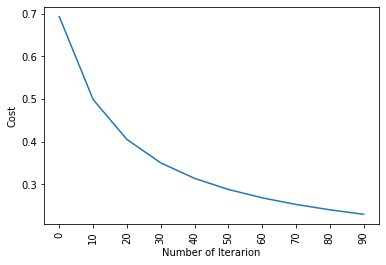

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [96]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations): 

	dimension = x_train.shape[0] 
	w, b = initialize_weights_and_bias(dimension) 
	
	parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations) 
	
	y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test) 
	y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train) 
	# train / test Errors 
	print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100)) 
	print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)) 
	
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 100) 

In [97]:
from sklearn import linear_model 
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150) 
print("test accuracy: {} ".format( 
	logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T))) 
print("train accuracy: {} ".format( 
	logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T))) 

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 
